In [280]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv('datasets/wdbc.csv').drop(columns = ['ID'])
df
malignant_count = df[df['Diagnosis'] == 'M'].shape[0]
print(f"Number of malignant diagnoses: {malignant_count}")

Number of malignant diagnoses: 212


# 1. Business/data understanding
The data includes Data Description:

Number of instances: 569
Number of features: 30
Target variable: Cancer diagnosis (M = Malignant, B = Benign)
Feature characteristics: Real-valued, computed from cell nucleus images

The features describe various characteristics of cell nuclei present in the digitized image, including:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

In [281]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()

df.Diagnosis.unique()

df['Diagnosis'] = pd.Categorical(df['Diagnosis'])

df['Diagnosis'] = df['Diagnosis'].astype(str)
df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})
df['Diagnosis'] = df['Diagnosis'].astype('category')

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

C:\Users\onnil\AppData\Local\Temp\ipykernel_18428\936038277.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})


In [282]:
X = df.drop(columns = 'Diagnosis')
Y = df['Diagnosis'] # targets

model = KNeighborsClassifier(n_neighbors = 2)
model.fit(df_scaled, Y)

KNeighborsClassifier(n_neighbors=2)

Accuracy of kNN classifier on the test set: 0.93
Accuracy of kNN classifier on the training set: 0.94


Text(0, 0.5, 'True Labels')

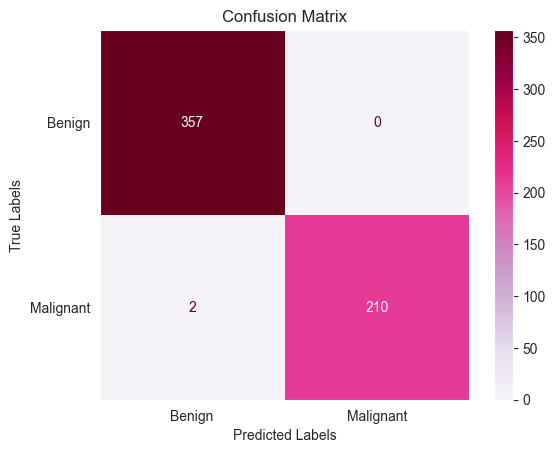

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred)
print(f"Accuracy of kNN classifier on the test set: {accuracy_test:.2f}")

y_train_pred = knn.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Accuracy of kNN classifier on the training set: {accuracy_train:.2f}")

y_pred = model.predict(df_scaled)

cm = confusion_matrix(Y, y_pred)

# Create a ConfusionMatrixDisplay object
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])

# Plot the confusion matrix with additional parameters for clarity
cmd.plot(cmap='PuRd')
cmd.ax_.grid(False)
cmd.ax_.set_title('Confusion Matrix')
cmd.ax_.set_xlabel('Predicted Labels')
cmd.ax_.set_ylabel('True Labels')

In [284]:
#Performance testing of precision, recall

In [285]:
precision_scores = precision_score(y_test, y_pred)

recall_scores = recall_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [171, 569]